# Practical example

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

## Preprocessing

### Exploring the descriptive statistics of the variables

In [4]:
raw_data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

### Determining the variables of interest

In [5]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4345         4345  4345.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          2019         3947          NaN  
mean           NaN          NaN  2006.550058  
std            NaN          NaN     6.719097  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

### Dealing with missing values

In [7]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
data_no_mv = data.dropna(axis=0) 

In [9]:
data_no_mv.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4025    4025.000000   4025  4025.000000  4025.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1534          NaN          NaN   
mean           NaN   19552.308065    NaN   163.572174     2.764586   
std            NaN   25815.734988    NaN   103.394703     4.935941   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    90.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21900.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4025         4025  4025.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1861         3654          NaN  
mean           NaN          NaN  2006.379627  
std            NaN          NaN     6.695595  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

### Exploring the PDFs

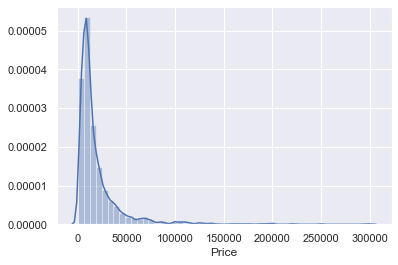

In [10]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [11]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3984    3984.000000   3984  3984.000000  3984.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1528          NaN          NaN   
mean           NaN   17837.117460    NaN   165.116466     2.743770   
std            NaN   18976.268315    NaN   102.766126     4.956057   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6980.000000    NaN    93.000000     1.800000   
50%            NaN   11400.000000    NaN   160.000000     2.200000   
75%            NaN   21000.000000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         3984         3984  3984.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1853         3613          NaN  
mean           NaN          NaN  2006.292922  
std            NaN          NaN     6.672745  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2002.750000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

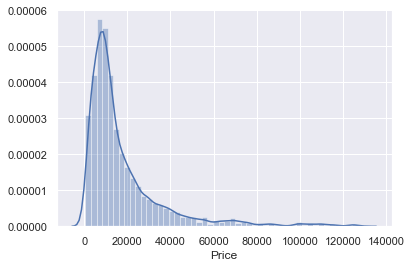

In [12]:
sns.distplot(data_1['Price'])

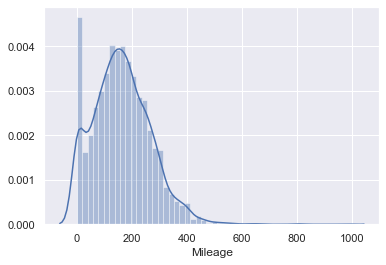

In [13]:
sns.distplot(data_no_mv['Mileage'])

In [14]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3944    3944.000000   3944  3944.000000  3944.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           867            NaN   1511          NaN          NaN   
mean           NaN   17933.880822    NaN   161.484026     2.747612   
std            NaN   19008.212025    NaN    96.027108     4.980406   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    7000.000000    NaN    92.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21376.250000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000    99.990000   

       Engine Type Registration         Year  
count         3944         3944  3944.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1825         3576          NaN  
mean           NaN          NaN  2006.389959  
std            NaN          NaN     6.595986  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

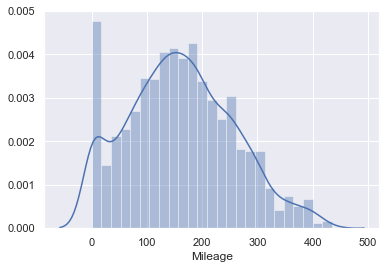

In [16]:
sns.distplot(data_2['Mileage'])

In [17]:
data_3 = data_2[data_2['EngineV']<6.5]

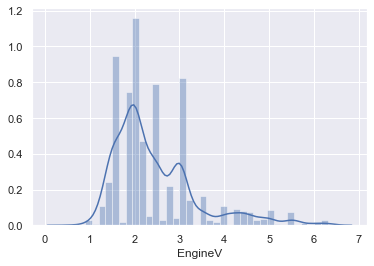

In [18]:
sns.distplot(data_3['EngineV'])

In [22]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

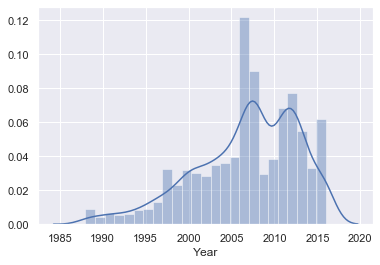

In [23]:
sns.distplot(data_4['Year'])

In [24]:
data_cleaned = data_4.reset_index(drop=True)

In [25]:
data_cleaned.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3867    3867.000000   3867  3867.000000  3867.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           848            NaN   1467          NaN          NaN   
mean           NaN   18194.455679    NaN   160.542539     2.450440   
std            NaN   19085.855165    NaN    95.633291     0.949366   
min            NaN     800.000000    NaN     0.000000     0.600000   
25%            NaN    7200.000000    NaN    91.000000     1.800000   
50%            NaN   11700.000000    NaN   157.000000     2.200000   
75%            NaN   21700.000000    NaN   225.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000     6.300000   

       Engine Type Registration         Year  
count         3867         3867  3867.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1807         3505          NaN  
mean           NaN          NaN  2006.709853  
std            NaN          NaN     6.103870  
min            NaN          NaN  1988.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

### Checking the OLS assumptions

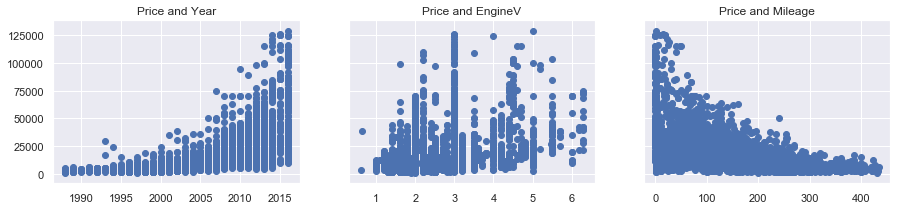

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

### Relaxing the assumptions

In [27]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
3862     Volkswagen   11500.0        van      163      2.5      Diesel   
3863         Toyota   17900.0      sedan       35      1.6      Petrol   
3864  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
3865            BMW    6500.0      sedan        1      3.5      Petrol   
3866     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  log_price  
0             yes  1991   8.342840  
1             yes  1999   8.974618  
2             yes  2003   9.495519  
3             yes  2007  10.043249  
4             yes  2011   9.814656  
...           ...   ...        ...  
3862          yes  2008   9.350102  
3863          yes  2014   9.792556  
3864          yes  2014  11.736069  
3865          yes  1999   8.779557  
3866          yes  2013   9.510445  

[3867 rows x 9 columns]

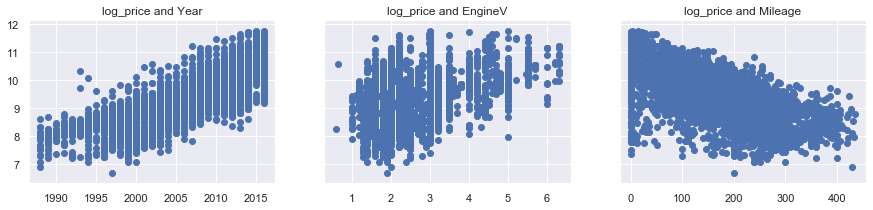

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')
plt.show()

In [29]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [30]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [32]:
vif

VIF features
0   3.791584  Mileage
1  10.354854     Year
2   7.662068  EngineV

In [33]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

### Create Dummy Variables

In [35]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [36]:
data_with_dummies

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0         277      2.0   8.342840          1                    0   
1         427      2.9   8.974618          0                    1   
2         358      5.0   9.495519          0                    1   
3         240      4.2  10.043249          0                    0   
4         120      2.0   9.814656          0                    0   
...       ...      ...        ...        ...                  ...   
3862      163      2.5   9.350102          0                    0   
3863       35      1.6   9.792556          0                    0   
3864        9      3.0  11.736069          0                    1   
3865        1      3.5   8.779557          1                    0   
3866      124      2.0   9.510445          0                    0   

      Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                    0              0             0                 0   
1                    0              0             0                 0   
2                    0              0             0                 0   
3                    0              0             0                 0   
4                    0              0             1                 0   
...                ...            ...           ...               ...   
3862                 0              0             0                 1   
3863                 0              0             1                 0   
3864                 0              0             0                 0   
3865                 0              0             0                 0   
3866                 0              0             0                 1   

      Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  \
0              0           0           1           0         0   
1              0           0           0           0         1   
2              0           0           1           0         0   
3              0           0           0           0         0   
4              0           0           0           0         0   
...          ...         ...         ...         ...       ...   
3862           0           0           0           0         1   
3863           0           0           1           0         0   
3864           0           0           1           0         0   
3865           0           0           1           0         0   
3866           0           0           0           0         1   

      Engine Type_Gas  Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                   0                  0                   1                 1  
1                   0                  0                   0                 1  
2                   1                  0                   0                 1  
3                   0                  0                   1                 1  
4                   0                  0                   1                 1  
...               ...                ...                 ...               ...  
3862                0                  0                   0                 1  
3863                0                  0                   1                 1  
3864                0                  0                   0                 1  
3865                0                  0                   1                 1  
3866                0                  0                   0                 1  

[3867 rows x 18 columns]

### Rearrange a bit

In [37]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [38]:
cols = [ 'log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [39]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0   8.342840      277      2.0          1                    0   
1   8.974618      427      2.9          0                    1   
2   9.495519      358      5.0          0                    1   
3  10.043249      240      4.2          0                    0   
4   9.814656      120      2.0          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

### Linear Regression Model

#### Declare the inputs and the targets

In [40]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

#### Scale the data

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
inputs_scaled = scaler.transform(inputs)

#### Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

#### Create the Regression

In [44]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_hat = reg.predict(x_train)

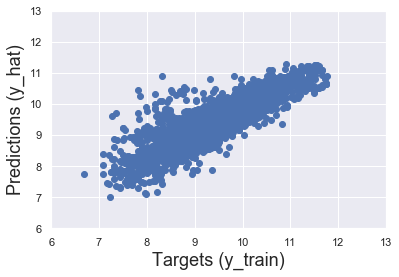

In [47]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

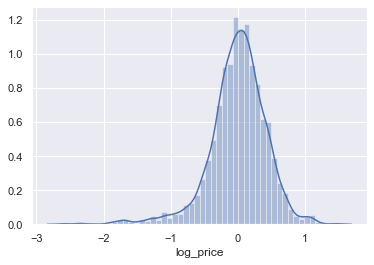

In [48]:
sns.distplot(y_train - y_hat)

In [49]:
reg.score(x_train,y_train)

0.7546487921881218

#### Finding the weights and bias

In [51]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

Features   Weights
0               Mileage -0.468156
1               EngineV  0.215268
2             Brand_BMW  0.011052
3   Brand_Mercedes-Benz  0.005692
4      Brand_Mitsubishi -0.142472
5         Brand_Renault -0.187693
6          Brand_Toyota -0.065297
7      Brand_Volkswagen -0.098989
8            Body_hatch -0.139808
9            Body_other -0.093845
10           Body_sedan -0.178928
11           Body_vagon -0.114576
12             Body_van -0.156680
13      Engine Type_Gas -0.116853
14    Engine Type_Other -0.025723
15   Engine Type_Petrol -0.151062
16     Registration_yes  0.314421

In [52]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

#### Testing

In [54]:
y_hat_test = reg.predict(x_test)

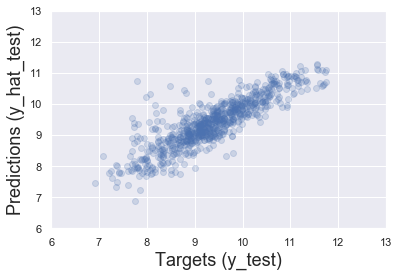

In [56]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [58]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf

Prediction
0    40419.308971
1     7956.895960
2     5757.284408
3     9765.810605
4     7027.363814
..            ...
769   4699.586013
770   9123.067372
771   6267.803094
772  20906.128600
773   9244.000735

[774 rows x 1 columns]

In [60]:
df_pf['Target'] = np.exp(y_test)
df_pf

Prediction  Target
0    40419.308971  4200.0
1     7956.895960     NaN
2     5757.284408     NaN
3     9765.810605     NaN
4     7027.363814     NaN
..            ...     ...
769   4699.586013     NaN
770   9123.067372     NaN
771   6267.803094     NaN
772  20906.128600     NaN
773   9244.000735     NaN

[774 rows x 2 columns]

In [61]:
y_test = y_test.reset_index(drop=True)
y_test

0       9.966462
1       9.093807
2       8.086410
3       9.392662
4       8.594154
         ...    
769     8.342840
770     9.082507
771     8.486734
772    10.203592
773     9.296518
Name: log_price, Length: 774, dtype: float64

In [62]:
df_pf['Target'] = np.exp(y_test)
df_pf

Prediction   Target
0    40419.308971  21300.0
1     7956.895960   8900.0
2     5757.284408   3250.0
3     9765.810605  12000.0
4     7027.363814   5400.0
..            ...      ...
769   4699.586013   4200.0
770   9123.067372   8800.0
771   6267.803094   4850.0
772  20906.128600  27000.0
773   9244.000735  10900.0

[774 rows x 2 columns]

In [63]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [65]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [67]:
df_pf.describe()

Prediction         Target      Residual  Difference%
count    774.000000     774.000000    774.000000   774.000000
mean   16113.011638   17799.988992   1686.977355    42.085282
std    13326.229797   19723.434542  11192.614496    96.169928
min      967.030415     999.000000 -42859.020603     0.020246
25%     7467.591694    6700.000000  -2246.354353    11.024941
50%    11914.358989   11050.000000    -38.697776    24.086183
75%    20249.505640   20475.000000   3004.524837    42.381716
max    79026.348020  125000.000000  81051.158885  1785.792525

In [70]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by='Difference%')

Prediction    Target  Residual  Difference%
387    13602.75  13600.00     -2.75         0.02
74     28889.06  28900.00     10.94         0.04
314    35530.21  35500.00    -30.21         0.09
336    11313.27  11300.00    -13.27         0.12
425     2995.68   3000.00      4.32         0.14
262    52180.11  52055.25   -124.86         0.24
674     3107.51   3100.00     -7.51         0.24
648     9675.57   9700.00     24.43         0.25
79     21407.59  21335.00    -72.59         0.34
313     9865.72   9900.00     34.28         0.35
16     12257.04  12300.00     42.96         0.35
549     9040.90   9000.00    -40.90         0.45
581    11554.52  11500.00    -54.52         0.47
671    42728.70  42500.00   -228.70         0.54
250     6736.49   6700.00    -36.49         0.54
456     3878.09   3900.00     21.91         0.56
563     8151.45   8200.00     48.55         0.59
113     5033.58   5000.00    -33.58         0.67
529    32158.13  32400.00    241.87         0.75
145    18543.19  18700.00    156.81         0.84
480    18888.88  18700.00   -188.88         1.01
263    16820.70  17000.00    179.30         1.05
520     5460.40   5400.00    -60.40         1.12
534     7077.79   6999.00    -78.79         1.13
436     1530.62   1550.00     19.38         1.25
453    12358.46  12200.00   -158.46         1.30
667    37798.37  38300.00    501.63         1.31
102    16772.48  16999.00    226.52         1.33
291    12626.83  12800.00    173.17         1.35
753    17742.21  17500.00   -242.21         1.38
464    12318.70  12500.00    181.30         1.45
756     6497.81   6400.00    -97.81         1.53
22     26438.30  25999.00   -439.30         1.69
177    10311.04  10500.00    188.96         1.80
130     5203.59   5300.00     96.41         1.82
349    22290.65  22711.65    421.00         1.85
50      6571.82   6699.00    127.18         1.90
726    75324.97  73900.00  -1424.97         1.93
95      7353.63   7500.00    146.37         1.95
359    12645.69  12900.00    254.31         1.97
476    12770.59  12499.00   -271.59         2.17
509    41965.41  42900.00    934.59         2.18
302    19026.21  19500.00    473.79         2.43
727     8560.18   8350.00   -210.18         2.52
149    16978.04  16555.00   -423.04         2.56
264     8939.67   8700.00   -239.67         2.75
133     6474.90   6300.00   -174.90         2.78
572     9038.89   9300.00    261.11         2.81
468     6785.47   6600.00   -185.47         2.81
191     6891.01   6700.00   -191.01         2.85
715    22335.41  23000.00    664.59         2.89
278     2815.34   2900.00     84.66         2.92
766    13899.37  13499.00   -400.37         2.97
487     4325.31   4200.00   -125.31         2.98
744    12506.72  12900.00    393.28         3.05
658     4067.27   4200.00    132.73         3.16
224    11148.59  10800.00   -348.59         3.23
481    29841.46  28900.00   -941.46         3.26
49     13630.20  13200.00   -430.20         3.26
553     9296.69   9000.00   -296.69         3.30
281    18270.67  18900.00    629.33         3.33
156     7246.61   7500.00    253.39         3.38
409     6722.21   6500.00   -222.21         3.42
657    18346.18  18999.00    652.82         3.44
492     5785.33   6000.00    214.67         3.58
590    21107.44  21900.00    792.56         3.62
226    19687.35  18999.00   -688.35         3.62
577    45597.17  44000.00  -1597.17         3.63
770     9123.07   8800.00   -323.07         3.67
92     25818.91  24900.00   -918.91         3.69
27     10062.08   9700.00   -362.08         3.73
89      7698.56   8000.00    301.44         3.77
85     18578.60  17900.00   -678.60         3.79
438    23081.50  24000.00    918.50         3.83
60     43510.26  41900.00  -1610.26         3.84
421    12982.56  12500.00   -482.56         3.86
358    27394.78  28500.00   1105.22         3.88
151    12872.08  13400.00    527.92         3.94
39      5759.79   6000.00    240.21         4.00
122     9986.72   9599.00   -387.72         4.04
544     2654.86   2550.00   -104.86 

### Adding back Model

In [71]:
raw_data.describe(include='all')

Brand     Price   Body  Mileage  EngineV Engine Type  \
count         4345   4173.00   4345  4345.00  4195.00        4345   
unique           7       nan      6      nan      nan           4   
top     Volkswagen       nan  sedan      nan      nan      Diesel   
freq           936       nan   1649      nan      nan        2019   
mean           NaN  19418.75    NaN   161.24     2.79         NaN   
std            NaN  25584.24    NaN   105.71     5.07         NaN   
min            NaN    600.00    NaN     0.00     0.60         NaN   
25%            NaN   6999.00    NaN    86.00     1.80         NaN   
50%            NaN  11500.00    NaN   155.00     2.20         NaN   
75%            NaN  21700.00    NaN   230.00     3.00         NaN   
max            NaN 300000.00    NaN   980.00    99.99         NaN   

       Registration    Year    Model  
count          4345 4345.00     4345  
unique            2     nan      312  
top             yes     nan  E-Class  
freq           3947     nan      199  
mean            NaN 2006.55      NaN  
std             NaN    6.72      NaN  
min             NaN 1969.00      NaN  
25%             NaN 2003.00      NaN  
50%             NaN 2008.00      NaN  
75%             NaN 2012.00      NaN  
max             NaN 2016.00      NaN

In [72]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [73]:
raw_data_no_mv = raw_data.dropna(axis=0) 

In [75]:
raw_data_no_mv.describe(include='all')

Brand     Price   Body  Mileage  EngineV Engine Type  \
count         4025   4025.00   4025  4025.00  4025.00        4025   
unique           7       nan      6      nan      nan           4   
top     Volkswagen       nan  sedan      nan      nan      Diesel   
freq           880       nan   1534      nan      nan        1861   
mean           NaN  19552.31    NaN   163.57     2.76         NaN   
std            NaN  25815.73    NaN   103.39     4.94         NaN   
min            NaN    600.00    NaN     0.00     0.60         NaN   
25%            NaN   6999.00    NaN    90.00     1.80         NaN   
50%            NaN  11500.00    NaN   158.00     2.20         NaN   
75%            NaN  21900.00    NaN   230.00     3.00         NaN   
max            NaN 300000.00    NaN   980.00    99.99         NaN   

       Registration    Year    Model  
count          4025 4025.00     4025  
unique            2     nan      306  
top             yes     nan  E-Class  
freq           3654     nan      188  
mean            NaN 2006.38      NaN  
std             NaN    6.70      NaN  
min             NaN 1969.00      NaN  
25%             NaN 2003.00      NaN  
50%             NaN 2007.00      NaN  
75%             NaN 2012.00      NaN  
max             NaN 2016.00      NaN

In [76]:
q = raw_data_no_mv['Price'].quantile(0.99)
_data_1 = raw_data_no_mv[raw_data_no_mv['Price']<q]
_data_1.describe(include='all')

Brand     Price   Body  Mileage  EngineV Engine Type  \
count         3984   3984.00   3984  3984.00  3984.00        3984   
unique           7       nan      6      nan      nan           4   
top     Volkswagen       nan  sedan      nan      nan      Diesel   
freq           880       nan   1528      nan      nan        1853   
mean           NaN  17837.12    NaN   165.12     2.74         NaN   
std            NaN  18976.27    NaN   102.77     4.96         NaN   
min            NaN    600.00    NaN     0.00     0.60         NaN   
25%            NaN   6980.00    NaN    93.00     1.80         NaN   
50%            NaN  11400.00    NaN   160.00     2.20         NaN   
75%            NaN  21000.00    NaN   230.00     3.00         NaN   
max            NaN 129222.00    NaN   980.00    99.99         NaN   

       Registration    Year    Model  
count          3984 3984.00     3984  
unique            2     nan      302  
top             yes     nan  E-Class  
freq           3613     nan      188  
mean            NaN 2006.29      NaN  
std             NaN    6.67      NaN  
min             NaN 1969.00      NaN  
25%             NaN 2002.75      NaN  
50%             NaN 2007.00      NaN  
75%             NaN 2011.00      NaN  
max             NaN 2016.00      NaN

In [77]:
q = _data_1['Mileage'].quantile(0.99)
_data_2 = _data_1[_data_1['Mileage']<q]
_data_2.describe(include='all')

Brand     Price   Body  Mileage  EngineV Engine Type  \
count         3944   3944.00   3944  3944.00  3944.00        3944   
unique           7       nan      6      nan      nan           4   
top     Volkswagen       nan  sedan      nan      nan      Diesel   
freq           867       nan   1511      nan      nan        1825   
mean           NaN  17933.88    NaN   161.48     2.75         NaN   
std            NaN  19008.21    NaN    96.03     4.98         NaN   
min            NaN    600.00    NaN     0.00     0.60         NaN   
25%            NaN   7000.00    NaN    92.00     1.80         NaN   
50%            NaN  11500.00    NaN   158.00     2.20         NaN   
75%            NaN  21376.25    NaN   230.00     3.00         NaN   
max            NaN 129222.00    NaN   435.00    99.99         NaN   

       Registration    Year    Model  
count          3944 3944.00     3944  
unique            2     nan      299  
top             yes     nan  E-Class  
freq           3576     nan      185  
mean            NaN 2006.39      NaN  
std             NaN    6.60      NaN  
min             NaN 1969.00      NaN  
25%             NaN 2003.00      NaN  
50%             NaN 2007.00      NaN  
75%             NaN 2011.00      NaN  
max             NaN 2016.00      NaN

In [79]:
_data_3 = _data_2[_data_2['EngineV']<6.5]

In [80]:
q = _data_3['Year'].quantile(0.01)
_data_4 = _data_3[_data_3['Year']>q]

In [81]:
_data_cleaned = _data_4.reset_index(drop=True)

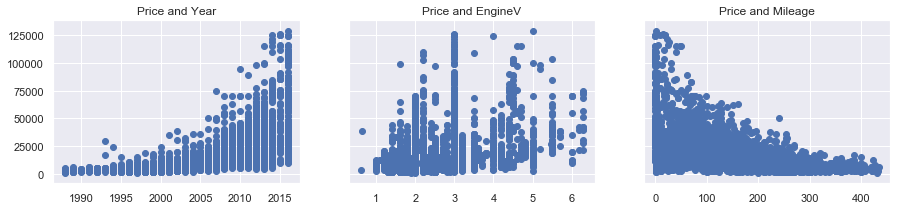

In [82]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(_data_cleaned['Year'],_data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(_data_cleaned['EngineV'],_data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(_data_cleaned['Mileage'],_data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

In [83]:
_log_price = np.log(_data_cleaned['Price'])
_data_cleaned['log_price'] = _log_price
_data_cleaned

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW   4200.00      sedan      277     2.00      Petrol   
1     Mercedes-Benz   7900.00        van      427     2.90      Diesel   
2     Mercedes-Benz  13300.00      sedan      358     5.00         Gas   
3              Audi  23000.00  crossover      240     4.20      Petrol   
4            Toyota  18300.00  crossover      120     2.00      Petrol   
...             ...       ...        ...      ...      ...         ...   
3862     Volkswagen  11500.00        van      163     2.50      Diesel   
3863         Toyota  17900.00      sedan       35     1.60      Petrol   
3864  Mercedes-Benz 125000.00      sedan        9     3.00      Diesel   
3865            BMW   6500.00      sedan        1     3.50      Petrol   
3866     Volkswagen  13500.00        van      124     2.00      Diesel   

     Registration  Year              Model  log_price  
0             yes  1991                320       8.34  
1             yes  1999       Sprinter 212       8.97  
2             yes  2003              S 500       9.50  
3             yes  2007                 Q7      10.04  
4             yes  2011              Rav 4       9.81  
...           ...   ...                ...        ...  
3862          yes  2008   T5 (Transporter)       9.35  
3863          yes  2014            Corolla       9.79  
3864          yes  2014              S 350      11.74  
3865          yes  1999                535       8.78  
3866          yes  2013  T5 (Transporter)        9.51  

[3867 rows x 10 columns]

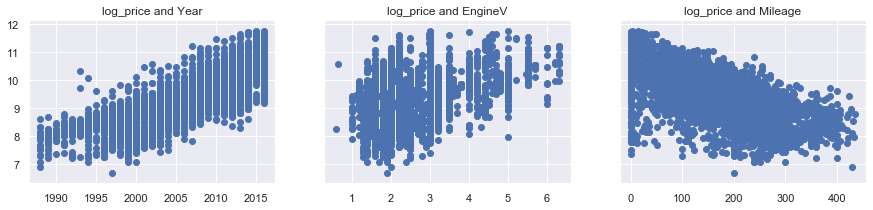

In [84]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(_data_cleaned['Year'],_data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(_data_cleaned['EngineV'],_data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(_data_cleaned['Mileage'],_data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')
plt.show()

In [86]:
_data_cleaned = _data_cleaned.drop(['Price'],axis=1)

In [87]:
_data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

In [88]:
_data_no_multicollinearity = _data_cleaned.drop(['Year'],axis=1)

In [89]:
_data_with_dummies = pd.get_dummies(_data_no_multicollinearity, drop_first=True)

In [90]:
_data_with_dummies

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0         277     2.00       8.34          1                    0   
1         427     2.90       8.97          0                    1   
2         358     5.00       9.50          0                    1   
3         240     4.20      10.04          0                    0   
4         120     2.00       9.81          0                    0   
...       ...      ...        ...        ...                  ...   
3862      163     2.50       9.35          0                    0   
3863       35     1.60       9.79          0                    0   
3864        9     3.00      11.74          0                    1   
3865        1     3.50       8.78          1                    0   
3866      124     2.00       9.51          0                    0   

      Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                    0              0             0                 0   
1                    0              0             0                 0   
2                    0              0             0                 0   
3                    0              0             0                 0   
4                    0              0             1                 0   
...                ...            ...           ...               ...   
3862                 0              0             0                 1   
3863                 0              0             1                 0   
3864                 0              0             0                 0   
3865                 0              0             0                 0   
3866                 0              0             0                 1   

      Body_hatch  ...  Model_Vito  Model_X1  Model_X3  Model_X5  Model_X5 M  \
0              0  ...           0         0         0         0           0   
1              0  ...           0         0         0         0           0   
2              0  ...           0         0         0         0           0   
3              0  ...           0         0         0         0           0   
4              0  ...           0         0         0         0           0   
...          ...  ...         ...       ...       ...       ...         ...   
3862           0  ...           0         0         0         0           0   
3863           0  ...           0         0         0         0           0   
3864           0  ...           0         0         0         0           0   
3865           0  ...           0         0         0         0           0   
3866           0  ...           0         0         0         0           0   

      Model_X6  Model_X6 M  Model_Yaris  Model_Z3  Model_Z4  
0            0           0            0         0         0  
1            0           0            0         0         0  
2            0           0            0         0         0  
3            0           0            0         0         0  
4            0           0            0         0         0  
...        ...         ...          ...       ...       ...  
3862         0           0            0         0         0  
3863         0           0            0         0         0  
3864         0           0            0         0         0  
3865         0           0            0         0         0  
3866         0           0            0         0         0  

[3867 rows x 308 columns]

In [91]:
_data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_73

In [92]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
       'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
       'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
       'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']

In [93]:
_data_preprocessed = _data_with_dummies[cols]
_data_preprocessed.head()

log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0       8.34      277     2.00          1                    0   
1       8.97      427     2.90          0                    1   
2       9.50      358     5.00          0                    1   
3      10.04      240     4.20          0                    0   
4       9.81      120     2.00          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  ...  Model_Vito  Model_X1  Model_X3  Model_X5  Model_X5 M  \
0           0  ...           0         0         0         0           0   
1           0  ...           0         0         0         0           0   
2           0  ...           0         0         0         0           0   
3           0  ...           0         0         0         0           0   
4           0  ...           0         0         0         0           0   

   Model_X6  Model_X6 M  Model_Yaris  Model_Z3  Model_Z4  
0         0           0            0         0         0  
1         0           0            0         0         0  
2         0           0            0         0         0  
3         0           0            0         0         0  
4         0           0            0         0         0  

[5 rows x 308 columns]

In [94]:
targets = _data_preprocessed['log_price']
inputs = _data_preprocessed.drop(['log_price'],axis=1)

In [95]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [96]:
inputs_scaled = scaler.transform(inputs)

In [97]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

In [98]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
y_hat = reg.predict(x_train)

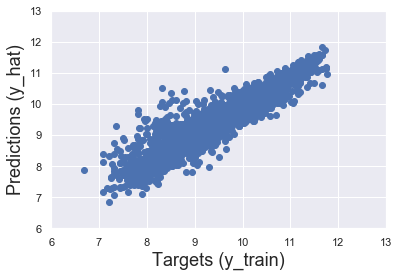

In [100]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [101]:
reg.score(x_train,y_train)

0.8435376265607596

In [102]:
y_hat_test = reg.predict(x_test)

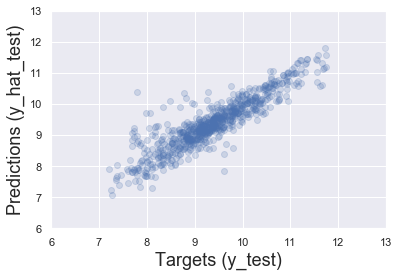

In [103]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [104]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf

C:\Users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


Prediction
0      23354.21
1      10187.77
2          0.00
3      10554.88
4       7051.69
5      14668.31
6      19570.43
7       6426.91
8      35463.43
9      44568.07
10          inf
11     16825.52
12      4194.34
13      4391.34
14      5528.86
15      1819.44
16     13965.88
17      2735.31
18      8491.44
19      9123.34
20     10103.55
21      7801.70
22     25555.83
23      6854.79
24     18889.75
25      2783.82
26     10212.67
27     10642.85
28      2151.70
29    131859.17
30      6278.03
31      8896.78
32     19854.37
33     17559.96
34     18290.70
35      2953.97
36      6181.08
37      9990.72
38      6356.69
39      4382.77
40     17086.31
41      7171.49
42     10477.85
43      9553.01
44     25153.48
45     27504.56
46     11153.62
47      8363.88
48     10493.21
49     15489.04
50      7548.76
51      6571.30
52     11323.73
53     16891.37
54     15980.72
55     12089.41
56     13705.79
57     26534.96
58      9058.97
59      3661.94
60     36339.89
61      7058.58
62     93524.98
63      6741.93
64      2786.54
65     18687.91
66      2642.76
67      3059.30
68     22224.98
69     14943.02
70     11208.21
71     20990.88
72      7417.22
73     14144.31
74     29199.92
75      7295.10
76     40372.17
77     15690.77
78     36446.51
79         0.00
80      8970.94
81     16327.77
82     53851.31
83      5139.01
84     35282.08
85     17641.60
86     11928.17
87     10534.28
88     94627.43
89      8298.79
90     11555.53
91     19010.03
92     22696.55
93      5369.89
94     16592.99
95     10936.55
96     22192.45
97     11933.99
98     18889.75
99      9629.11
100    41826.96
101    14600.43
102    20746.33
103    14272.66
104     8790.98
105    42485.64
106    15675.45
107     8999.46
108     6461.52
109    17216.11
110    11423.69
111     9600.94
112    12426.06
113     4385.98
114     6753.46
115     4967.55
116     5866.07
117     9083.34
118    25000.42
119     9915.39
120     4530.74
121    17589.99
122    11093.87
123    13014.45
124    28516.55
125    13087.74
126    22382.89
127     3573.62
128     9647.94
129     2854.71
130     5427.88
131    19267.02
132    30348.29
133     6709.09
134     9907.52
135     3886.72
136    22608.07
137    52054.49
138    18963.68
139     6236.79
140    67991.38
141    11502.05
142     1181.34
143     5287.92
144     8470.73
145    17334.21
146    13891.07
147    43196.85
148    35986.74
149    25258.09
150     7107.00
151    14525.76
152     9809.45
153    69332.39
154     9780.75
155     4310.61
156     9316.92
157    13404.65
158    42651.92
159    11482.41
160    32007.27
161     5255.75
162    52041.79
163     7697.64
164    16686.43
165    47407.73
166    37539.24
167     7402.75
168    10943.23
169     7257.80
170    12101.23
171    19037.90
172    16492.03
173    11265.82
174    61801.15
175    29972.77
176     3461.98
177     8875.09
178    34532.15
179    12351.96
180     5225.04
181     3911.47
182    11279.58
183    15779.12
184     9449.79
185    42464.90
186     2113.69
187    12345.93
188    13565.97
189     8172.12
190     7543.23
191     7031.06
192    18086.43
193    45469.29
194    12113.05
195     6497.91
196     9956.63
197    10299.05
198     9589.23
199    59100.79
200    11671.78
201     6155.10
202    12759.62
203    21140.02
204    36589.16
205     9572.86
206    34735.08
207     4035.63
208     7924.56
209     5749.81
210     3090.45
211    24884.72
212    45203.65
213    55628.59
214    23445.62
215    17161.56
216     6305.68
217     9055.66
218     5786.42
219    16228.42
220    22382.89
221         inf
222    38664.73
223     4468.12
224    11855.58
225    15034.50
226    16829.62
227     2144.35
228     9764.05
229    17572.82
230    16141.49
231    14983.20
232    22763.14
233    28136.19
234     3051.46
235    14367.05
236     9535.54
237     5312.51
238    21710.14
239        0.00
240     4644.98
241    24498.92
242     5338.51
243    89569.58
244    57059.12
245    24685.04
246     8144.24
247     8150.20
248     2647.92
249  

In [105]:
y_test = y_test.reset_index(drop=True)
y_test

0      9.97
1      9.09
2      8.09
3      9.39
4      8.59
5      9.64
6      8.34
7      9.13
8     10.92
9     11.55
10     7.09
11     9.09
12     9.01
13     8.70
14     8.90
15     7.84
16     9.42
17     7.21
18     8.70
19     9.06
20     9.04
21     9.20
22    10.17
23     9.39
24     9.85
25     8.00
26     9.71
27     9.18
28     8.09
29    11.73
30     7.78
31     9.42
32    10.58
33     9.88
34     9.53
35     8.50
36     7.88
37     9.47
38     8.32
39     8.70
40    10.06
41     8.56
42     9.27
43     9.16
44    10.20
45    10.26
46     9.37
47     9.21
48     9.15
49     9.49
50     8.81
51     8.87
52     8.78
53     9.38
54    10.10
55     9.56
56     9.38
57    10.26
58     7.74
59     7.65
60    10.64
61     9.19
62    11.35
63     8.47
64     7.67
65     9.56
66     7.82
67     7.90
68    10.04
69     9.55
70     8.78
71    10.03
72     8.58
73     9.58
74    10.27
75     8.84
76    10.48
77     9.95
78    10.26
79     9.97
80     8.76
81     9.79
82    10.95
83  

In [106]:
df_pf['Target'] = np.exp(y_test)
df_pf

Prediction    Target
0      23354.21  21300.00
1      10187.77   8900.00
2          0.00   3250.00
3      10554.88  12000.00
4       7051.69   5400.00
5      14668.31  15300.00
6      19570.43   4200.00
7       6426.91   9200.00
8      35463.43  55500.00
9      44568.07 104000.00
10          inf   1200.00
11     16825.52   8900.00
12      4194.34   8200.00
13      4391.34   6000.00
14      5528.86   7300.00
15      1819.44   2550.00
16     13965.88  12300.00
17      2735.31   1350.00
18      8491.44   6000.00
19      9123.34   8599.00
20     10103.55   8400.00
21      7801.70   9900.00
22     25555.83  25999.00
23      6854.79  11999.00
24     18889.75  19000.00
25      2783.82   2990.00
26     10212.67  16500.00
27     10642.85   9700.00
28      2151.70   3250.00
29    131859.17 124000.00
30      6278.03   2400.00
31      8896.78  12300.00
32     19854.37  39500.00
33     17559.96  19600.00
34     18290.70  13700.00
35      2953.97   4900.00
36      6181.08   2650.00
37      9990.72  12999.00
38      6356.69   4100.00
39      4382.77   6000.00
40     17086.31  23500.00
41      7171.49   5200.00
42     10477.85  10650.00
43      9553.01   9500.00
44     25153.48  26999.00
45     27504.56  28500.00
46     11153.62  11750.00
47      8363.88   9950.00
48     10493.21   9400.00
49     15489.04  13200.00
50      7548.76   6699.00
51      6571.30   7150.00
52     11323.73   6500.00
53     16891.37  11900.00
54     15980.72  24300.00
55     12089.41  14200.00
56     13705.79  11800.00
57     26534.96  28500.00
58      9058.97   2300.00
59      3661.94   2100.00
60     36339.89  41900.00
61      7058.58   9800.00
62     93524.98  85000.00
63      6741.93   4750.00
64      2786.54   2150.00
65     18687.91  14200.00
66      2642.76   2500.00
67      3059.30   2700.00
68     22224.98  22900.00
69     14943.02  14100.00
70     11208.21   6500.00
71     20990.88  22800.00
72      7417.22   5300.00
73     14144.31  14500.00
74     29199.92  28900.00
75      7295.10   6899.00
76     40372.17  35500.00
77     15690.77  21000.00
78     36446.51  28500.00
79         0.00  21335.00
80      8970.94   6400.00
81     16327.77  17800.00
82     53851.31  57000.00
83      5139.01   7400.00
84     35282.08  35900.00
85     17641.60  17900.00
86     11928.17  10900.00
87     10534.28   9000.00
88     94627.43 102800.00
89      8298.79   8000.00
90     11555.53   9600.00
91     19010.03  11700.00
92     22696.55  24900.00
93      5369.89   9000.00
94     16592.99  17800.00
95     10936.55   7500.00
96     22192.45  21000.00
97     11933.99  12950.00
98     18889.75  28500.00
99      9629.11   9300.00
100    41826.96  55555.00
101    14600.43  12090.00
102    20746.33  16999.00
103    14272.66  10250.00
104     8790.98   6100.00
105    42485.64  49999.00
106    15675.45  24500.00
107     8999.46  10900.00
108     6461.52  10000.00
109    17216.11  15700.00
110    11423.69   9300.00
111     9600.94  10800.00
112    12426.06  13500.00
113     4385.98   5000.00
114     6753.46   7100.00
115     4967.55   4100.00
116     5866.07   7899.00
117     9083.34   9200.00
118    25000.42  19700.00
119     9915.39   5800.00
120     4530.74   4800.00
121    17589.99  17191.20
122    11093.87   9599.00
123    13014.45  11800.00
124    28516.55  20300.00
125    13087.74  14490.00
126    22382.89  24000.00
127     3573.62   2700.00
128     9647.94   8800.00
129     2854.71   3500.00
130     5427.88   5300.00
131    19267.02  28950.00
132    30348.29  23500.00
133     6709.09   6300.00
134     9907.52  13600.00
135     3886.72   5500.00
136    22608.07  33200.00
137    52054.49  39900.00
138    18963.68  14000.00
139     6236.79   8000.00
140    67991.38 119000.00
141    11502.05  17595.00
142     1181.34   1450.00
143     5287.92   3900.00
144     8470.73   8300.00
145    17334.21  18700.00
146    13891.07  10200.00
147    43196.85  39999.00
148    35986.74  31111.00
149    25258.09  16555.00
150     7107.00   5700.00
151    14525.76  13400.00
152     9809.45  11700.00
1

In [107]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [108]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [109]:
df_pf.describe()

Prediction    Target  Residual  Difference%
count      774.00    774.00    774.00       774.00
mean          inf  17799.99      -inf          inf
std           nan  19723.43       nan          nan
min          0.00    999.00      -inf         0.09
25%       7008.79   6700.00  -1710.20         8.73
50%      11213.69  11050.00    215.93        18.31
75%      19833.81  20475.00   2266.08        35.49
max           inf 125000.00  74380.66          inf

In [110]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by='Difference%')

Prediction    Target  Residual  Difference%
332     3197.13   3200.00      2.87         0.09
262    51978.30  52055.25     76.95         0.15
205     9572.86   9599.00     26.14         0.27
505     3988.61   4000.00     11.39         0.28
730     9867.09   9900.00     32.91         0.33
487     4182.07   4200.00     17.93         0.43
646    11947.11  12000.00     52.89         0.44
705    17884.45  17800.00    -84.45         0.47
736     9949.34  10000.00     50.66         0.51
757    19000.75  19100.00     99.25         0.52
43      9553.01   9500.00    -53.01         0.56
24     18889.75  19000.00    110.25         0.58
770     8853.45   8800.00    -53.45         0.61
283    12913.18  13000.00     86.82         0.67
378     5660.66   5700.00     39.34         0.69
222    38664.73  39040.00    375.27         0.96
74     29199.92  28900.00   -299.92         1.04
679     6925.44   6999.00     73.56         1.05
178    34532.15  34900.00    367.85         1.05
392    14255.25  14100.00   -155.25         1.10
322     7113.94   7200.00     86.06         1.20
500    15432.42  15250.00   -182.42         1.20
117     9083.34   9200.00    116.66         1.27
571     9619.71   9750.00    130.29         1.34
167     7402.75   7300.00   -102.75         1.41
644    18761.06  18500.00   -261.06         1.41
85     17641.60  17900.00    258.40         1.44
321     9087.77   8950.00   -137.77         1.54
335     1378.43   1400.00     21.57         1.54
42     10477.85  10650.00    172.15         1.62
359    12691.27  12900.00    208.73         1.62
358    28026.50  28500.00    473.50         1.66
203    21140.02  21500.00    359.98         1.67
454    15252.63  15000.00   -252.63         1.68
22     25555.83  25999.00    443.17         1.70
435    21869.73  21500.00   -369.73         1.72
84     35282.08  35900.00    617.92         1.72
549     8844.80   9000.00    155.20         1.72
396    12722.29  12500.00   -222.29         1.78
166    37539.24  38233.00    693.76         1.81
530     5194.52   5100.00    -94.52         1.85
165    47407.73  46500.00   -907.73         1.95
638    14786.97  14500.00   -286.97         1.98
671    41643.55  42500.00    856.45         2.02
544     2602.42   2550.00    -52.42         2.06
144     8470.73   8300.00   -170.73         2.06
384    13779.60  13499.00   -280.60         2.08
725    13609.10  13900.00    290.90         2.09
409     6637.40   6500.00   -137.40         2.11
509    41990.67  42900.00    909.33         2.12
295    81236.08  83000.00   1763.92         2.13
229    17572.82  17200.00   -372.82         2.17
391     3882.92   3800.00    -82.92         2.18
369    15327.29  14999.00   -328.29         2.19
450     9582.21   9800.00    217.79         2.22
399     9185.92   9400.00    214.08         2.28
769     4295.90   4200.00    -95.90         2.28
121    17589.99  17191.20   -398.79         2.32
695   105255.70 107777.00   2521.30         2.34
130     5427.88   5300.00   -127.88         2.41
421    12196.14  12500.00    303.86         2.43
73     14144.31  14500.00    355.69         2.45
524    38149.02  37200.00   -949.02         2.55
742    58870.37  60500.00   1629.63         2.69
577    45203.65  44000.00  -1203.65         2.74
245    24685.04  24000.00   -685.04         2.85
171    19037.90  19600.00    562.10         2.87
523     8642.02   8900.00    257.98         2.90
752    10192.74  10500.00    307.26         2.93
181     3911.47   3800.00   -111.47         2.93
68     22224.98  22900.00    675.02         2.95
353     1600.57   1650.00     49.43         3.00
518     4019.90   3900.00   -119.90         3.07
722     7752.34   8000.00    247.66         3.10
594    13918.23  13500.00   -418.23         3.10
743    13466.97  13900.00    433.03         3.12
486     9489.09   9200.00   -289.09         3.14
461    14328.52  14800.00    471.48         3.19
536    12231.92  11850.00   -381.92         3.22
563     8464.53   8200.00   -264.53         3.23
559    10632.47  10299.00   -333.47 